### Step 1 - Set up imports

In [4]:
# numpy - a package to work with arrays
import numpy as np

# math - a package to work with math
import math

# collections - a package to work with pre-built data structures
# Counter - a dictiory where each pair represents a character and how many times did it occur
from collections import Counter

# matplotlib - a package to visualize data
import matplotlib.pyplot as plt

### Step 2 - Choose and clean your text

In [6]:
# Just a random text
sample_text = """
Alice was beginning to get very tired of sitting by her sister on the bank,
and of having nothing to do: once or twice she had peeped into the book her
sister was reading...
"""

'''
isalpha - checks if a character belongs to English alphabet
isspace - checks if a character is space

chars - a list of characters (alphabetic or space)
'''
chars = [c.lower() for c in sample_text if c.isalpha() or c.isspace()]
len(chars)

170

### Step 3 - Build the empirical PMF (Probability Math Function)

In [8]:
# PMF (Probability Math Function) - returns a probability of a discrete value
def pmf_from_sequence(seq):
    # 1 step: count how many times does each character occur
    occurrences = Counter(seq)

    # 2 step: sum up all values (occurances) to a total number of characters
    total = sum(occurrences.values())

    # 3 step:
    # - get symbols from sequence in ascending order
    #
    # - convert a comprehension list to numpy array of type float
    chars = sorted(occurrences.keys())
    ps = np.array([occurrences[s] / total for s in chars], dtype=float)
    
    return chars, ps, occurrences, total

# _ ignores unsed variables
chars, ps, occurrences, total = pmf_from_sequence(chars)

print("Total characters:", total)
print("Unique characters:", len(chars))

Total characters: 22
Unique characters: 22


### Step 4 - Compute Schannon Entropy H(X)

In [10]:
def entropy_from_pmf(ps):
    # convert probabilities to numpy array of floats
    ps = np.asarray(ps, float)

    # remove zero probabilities
    ps = ps[ps > 0]

    # calculate and return a Shannon entropy
    return float(-np.sum(ps * np.log2(ps)))

# get shannon entropy
H_emp = entropy_from_pmf(ps)

# print Shannon entropy rounded to 4 decimal places
print(f"Empirical text entropy: {H_emp:.4f} bits/symbol")

Empirical text entropy: 4.4594 bits/symbol


### Step 5 - Plot Surprise (-log(2)p) for frequent symbols

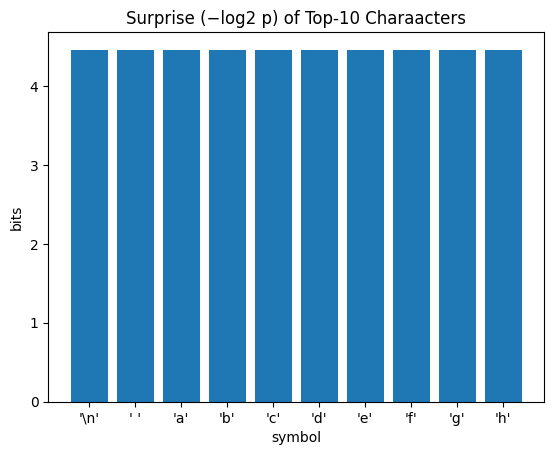

In [12]:
# a dictionary: key(char) : value(self-information of that char)
surprise = {c: -math.log2(p) for c, p in zip(chars, ps)}

# a list of top-10 characters based on occurrences
top_10 = sorted(chars, key=lambda c: occurrences[c], reverse=True)[:10]

# create a new figure
plt.figure()

# draw a bar chart with top-10 character frequencies
plt.bar([repr(c) for c in top_10], [surprise[c] for c in top_10])

# add a title
plt.title("Surprise (−log2 p) of Top-10 Charaacters")

# add y label
plt.ylabel("bits")

# add x label
plt.xlabel("symbol")

# show the chart
plt.show()

### Step 6 - Compare with a biased coin (empirical vs theory)

In [29]:
'''
A biased coin is also known as unfar coin (one side more likely)

p - probability of one side
n - a number of coin flips
seed - a number to initialize a random generator function

Returns: numpy array of 0/1 (1 means "heads"), length == n
'''
def biased_coin(p=0.73, n=100_000, seed=42):
    # a random generator of floats from 0 to 1
    rng = np.random.default_rng(seed)

    # Vectorized sampling:
    #  - rng.random(n) generates n floats in [0, 1).
    #  - (rng.random(n) < p) compares each float to p -> boolean array (True ≈ probability p).
    #  - .astype(int) converts True->1 and False->0, producing an int array of 0/1.
    return (rng.random(n) < p).astype(int)

def bernoulli_entropy(p):
    if p in (0.0, 1.0):
        return 0.0
    return -(p * math.log2(p) + (1 - p) * math.log2(1 - p))

p, n, seed = 0.73, 100_000, 42

flips = biased_coin(p=p, n=n, seed=seed)
_, ps_coin, _, _ = pmf_from_sequence(flips.tolist())

H_emp = entropy_from_pmf(ps_coin)
H_th = bernoulli_entropy(p)

print(f"Empirical:  {H_emp:.4f} bits")
print(f"Theoretical:{H_th:.4f} bits")
print(f"Δ = {H_emp - H_th:+.4f} bits")

Empirical:  0.8410 bits
Theoretical:0.8415 bits
Δ = -0.0005 bits
